<a href="https://colab.research.google.com/github/Himmmmanshu/Oasis-Infobyte-Internship/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Car Price Prediction through Python**
**Oasis Infobyte Data Science Internship**
# Task 3

Import Necessary Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

Importing DataSet

In [ ]:
df = pd.read_csv('CarPrice_Assignment.csv')

Analysing the DataSet



In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.shape

(205, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


**Data Preprocessing**

In [ ]:
df['car_ID'].is_unique

True

In [ ]:
df = df.set_index('car_ID')

In [ ]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [ ]:
df.value_counts('fueltype')

fueltype
gas       185
diesel     20
dtype: int64

In [ ]:
df['fueltype'] = df['fueltype'].map({'gas':0, 'diesel':1})

In [ ]:
df.value_counts('aspiration')

aspiration
std      168
turbo     37
dtype: int64

In [ ]:
df['aspiration'] = df['aspiration'].map({'std':0, 'turbo':1})

In [ ]:
df.value_counts('doornumber')

doornumber
four    115
two      90
dtype: int64

In [ ]:
df['doornumber'] = df['doornumber'].map({'four':4, 'two':2})

In [ ]:
df.value_counts('carbody')

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
dtype: int64

In [ ]:
df['carbody'] = df['carbody'].map({'sedan':1, 'hatchback':2, 'wagon':3, 'hardtop':4, 'convertible':5})

In [ ]:
df.value_counts('drivewheel')

drivewheel
fwd    120
rwd     76
4wd      9
dtype: int64

In [ ]:
df['drivewheel'] = df['drivewheel'].map({'fwd':1, 'rwd':2,'4wd':3})

In [ ]:
df.value_counts('enginelocation')

enginelocation
front    202
rear       3
dtype: int64

In [ ]:
df['enginelocation'] = df['enginelocation'].map({'front':1, 'rear':2})

In [ ]:
df.value_counts('enginetype')

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
dtype: int64

In [ ]:
df['enginetype'] = df['enginetype'].map({'ohc':1, 'ohcf':2, 'ohcv':3, 'dohc':4, 'l':5,'rotor':6,'dohcv':6 })

In [ ]:
df.value_counts('cylindernumber')

cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
dtype: int64

In [ ]:
df['cylindernumber'] = df['cylindernumber'].map({'four':4, 'six':6, 'five':5, 'eight':8, 'two':2,'three':3,'twelve':3 })

In [ ]:
df.value_counts('fuelsystem')

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
dtype: int64

In [ ]:
df['fuelsystem'] = df['fuelsystem'].map({'mpfi':1, '2bbl':2, 'idi':3, '1bbl':4, 'spdi':5,'4bbl':6,'mfi':6,'spfi':6 })

**Visualizing the DataSet**

```
# Analysing the DataSet to see the correlation between the X and y(price) varibale
```



In [ ]:
corr = df.corr()

<ipython-input-31-45893e33df67>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


In [ ]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [ ]:
corr_data = df[['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','cylindernumber','enginelocation','drivewheel','enginetype','price']]
corr = corr_data.corr()
plt.figure(figsize=(10,8), dpi =1000)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5,cmap='rainbow')
plt.show()

**Building Machine Learning Model**

```
Linear Regression Model
```



In [ ]:
X = corr_data.drop('price',axis = 1)
y = corr_data['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
predict = lr.predict(X_test)

Analyzing the predicted value

In [ ]:
range(len(y_test))

range(0, 62)

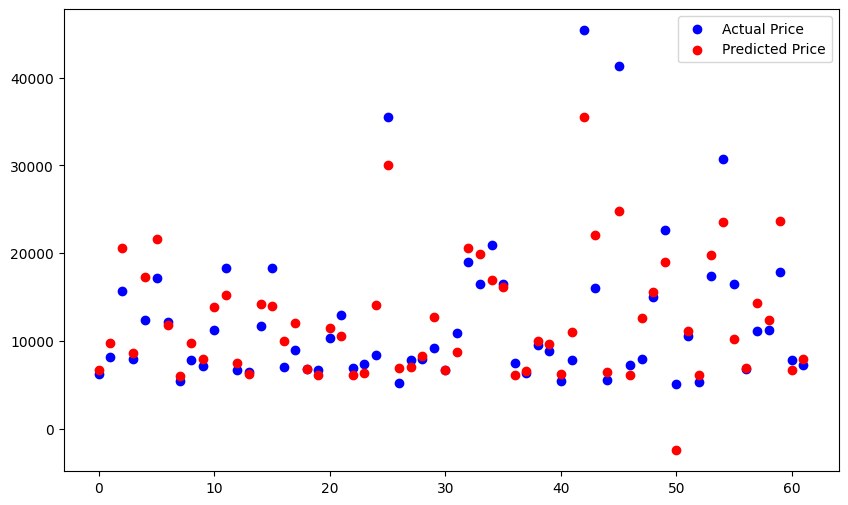

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)),y_test,color='blue',label='Actual Price')
plt.scatter(range(len(y_test)),predict,color='red',label='Predicted Price')
plt.legend()

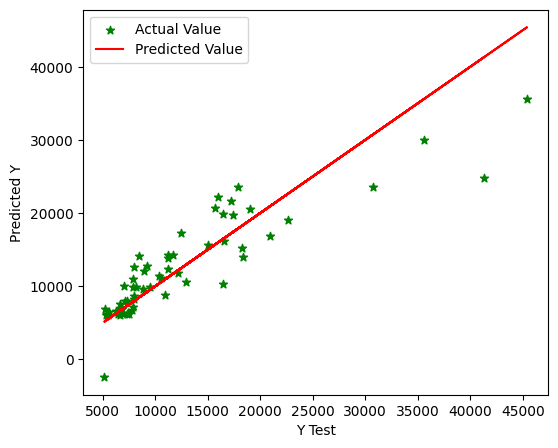

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(y_test,predict,c="g",marker="*",label='Actual Value')
plt.plot(y_test,y_test,c="r",label = 'Predicted Value')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.legend()
plt.show()

In [ ]:
print("MAE:",metrics.mean_absolute_error(y_test,predict))
print("MSE:",metrics.mean_squared_error(y_test,predict))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predict)))

MAE: 2614.251678876805
MSE: 14838605.006489666
RMSE: 3852.090991460309


<Axes: xlabel='price', ylabel='Count'>

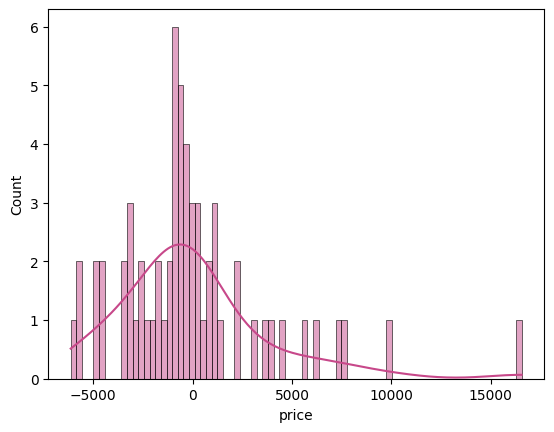

In [ ]:
sns.histplot(y_test-predict,bins=80,kde=True,color="#C7488A")

In [ ]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
wheelbase,121.533310
carlength,-39.390626
carwidth,1233.936961
curbweight,1.358457
enginesize,47.399586
boreratio,-3779.034456
horsepower,37.870959
citympg,-11.091615
highwaympg,-28.707523
cylindernumber,463.004283


In [ ]:
r2_score(y_test,predict)

0.7827813752528232